<a href="https://colab.research.google.com/github/CWoto/Phase-1-project/blob/main/Sampling%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Sampling

## Introduction

When working purely with mathematical formulas and theoretical probabilities, we can calculate certain quantities directly. Once we start working with actual datasets and real-world data collection limitations, we start to need additional statistical techniques in order to make inferences about populations. One of the foundational concepts involved is sampling, and how point estimates from samples help us to understand population statistics.

## Objectives

You will be able to:

* Describe how samples are able to allow data scientists to gain insights to a population

## Census vs. Sample

Rarely, if ever, are we able to completely survey a **population** of interest. Whatever we are trying to measure — asthma rates, fish populations, daily temperatures, material volumes, manufacturing defects — we are unlikely to have complete information about the system in question.

If we performed a complete enumeration of all data points (e.g. testing every person in a population for asthma), that would be a **census**. Similar to the United States Census, our example census would be very expensive, and for some kinds of measurements it would be simply impossible.

More realistically, data scientists are typically working with a **sample** that represents some subset of the population of interest. From that sample, we can calculate **point estimates** for measurements such as the mean. Then using our knowledge of statistical distributions, we are able to make inferences about about the true population statistics, without ever having to survey the entire population!

### Connections to Previous Concepts

These concepts tie in to the **set theory concepts** previously introduced:

* The *population* is equivalent to the *universal set*. Just like a universal set, a population is not necessarily all possible things that have ever existed, it just means all possible things within some defined specification.
* The *sample* is a *subset* of this population. Every element in the sample is part of the population. In theory we could have a sample that includes every member of the population, but typically when we call something a "sample" we mean that it is a *proper subset* of the population (that the population contains additional members that are not part of the sample).

Also, recall what we previously learned about **descriptive statistics**:

* Statistical measures such as *measures of central tendency* (e.g. mean, median) and *measures of spread* (e.g. absolute deviation, standard deviation) are used to describe the *distribution* of a given collection of data points. We also use visualizations such as *histograms* and box plots to understand the shape of distributions.
* These descriptive statistics can apply to populations or samples. When they are applied to populations they are called *population statistics*, and when they are applied to samples they are called *point estimates*.
* In mathematical notation, we often use different symbols for a given statistic depending on whether it applies to the population or a sample. Some examples of those differences are listed below:
  * Number
    * $N$ is the number of individuals/cases in a population
    * $n$ is the number of individuals/cases in sample
  * Mean
    * $\mu$ is the population mean (pronounced "mu")
    * $\bar{x}$ is the sample mean (pronounced "x bar")
  * Standard Deviation
    * $\sigma$ is the population standard deviation (pronounced "sigma")
    * $s$ is the sample standard deviation

## Case Study: Estimating Mean Age

In the following example, let's say we are trying to estimate the **mean age of a population**.

The population we'll use is quite small: people who were on board the Titanic (a classic "toy dataset").

***Note:*** In this case, we actually do have data about the entire population, since it includes fewer than 1000 people. If you have access to a complete census like this, then you don't actually need to use statistical techniques to make statements about population parameters. But we are going to use this as an example because it will allow us to compare the mean age point estimates to the true population mean age.

Let's start by importing the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('titanic.csv', index_col=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Finding the Population Statistic $\mu$

Again, we actually have a census of the entire population, so if we want to know the mean age for the population, we can simply calculate that directly:

In [ ]:
population_mean = df.Age.mean()
population_mean

29.69911764705882

In [ ]:
df.shape

(891, 12)

In [ ]:
df_gender = df["Sex"].dropna()
df_gender.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
gender_count= df_gender.value_counts()
gender_count


,count
Sex,
male,577
female,314


In [ ]:
pmf=gender_count/df_gender.shape[0]
pmf

,count
Sex,
male,0.647587
female,0.352413


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline

<Axes: xlabel='Sex'>

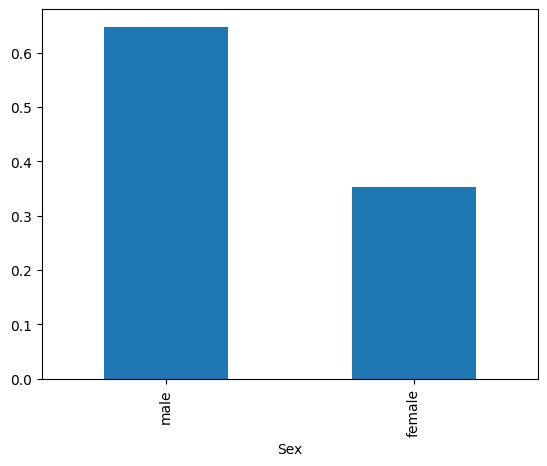

In [ ]:
#plot the pmf
pmf.plot(kind = "bar")

In [ ]:
#probability  density function PDF( for continuous data)
from scipy.stats import gaussian_kde
from scipy.integrate import  trapezoid


In [ ]:
df_age= df["Age"].dropna()
df_age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
#generate the estimator
kde=gaussian_kde(df_age)
kde

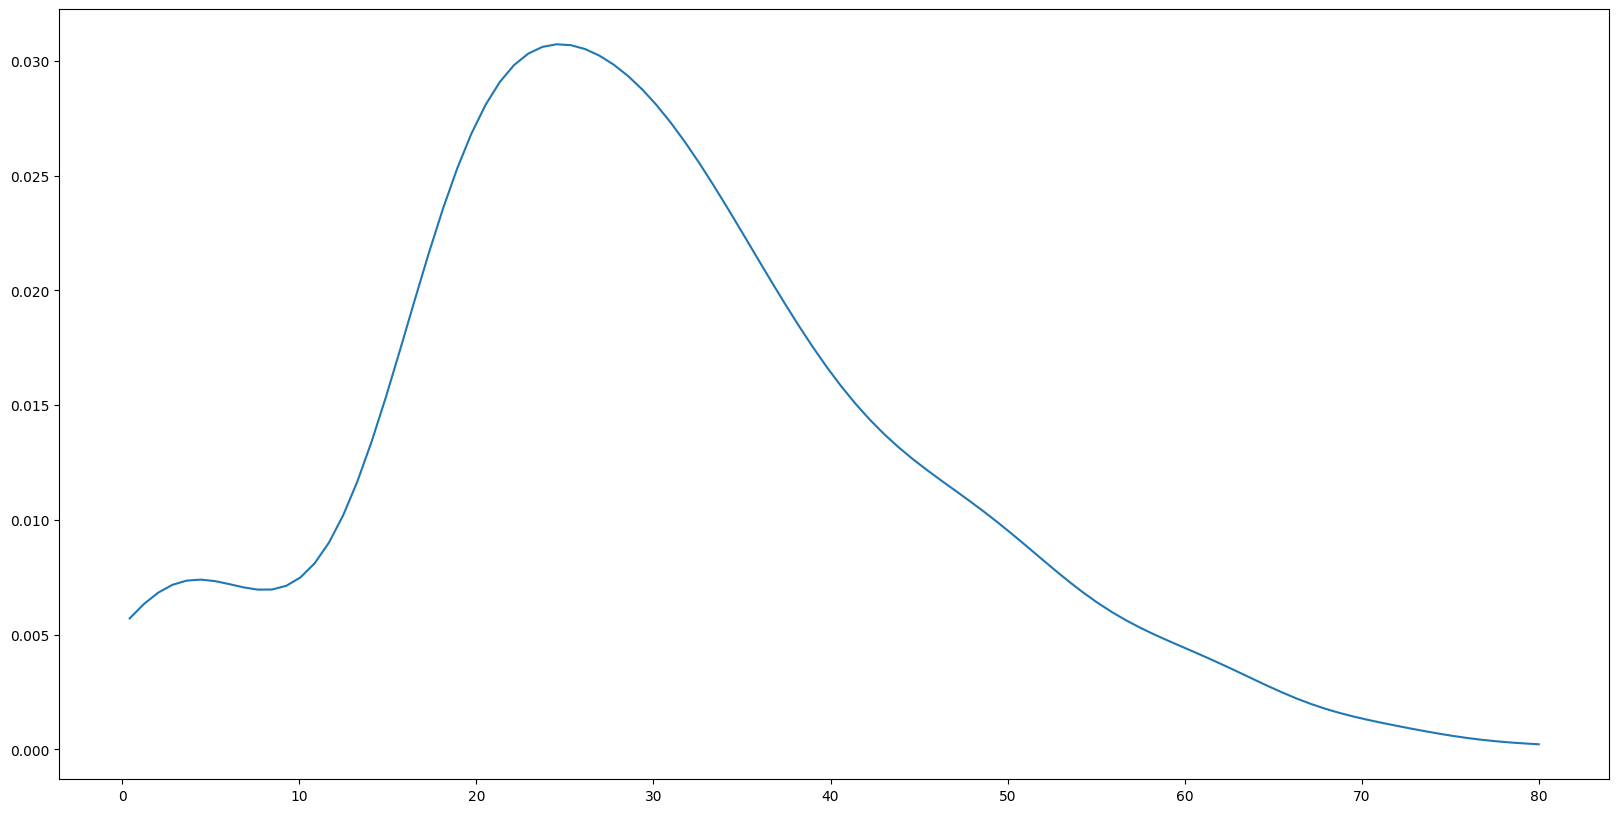

In [ ]:
#create a range
age_range = np.linspace(df_age.min(), df_age.max(), 100)
pdf = kde(age_range)
pdf
plt.figure(figsize=(20,10))
plt.plot(age_range, pdf)
plt.show()


### $\bar{x}$ for One Sample

Let's see what happens when we take a sample in order to estimate this population parameter. (Again remember, this is called a point estimate!)

This represents what we might reasonably have in a real-world data collection context.

In [ ]:
# Take a sample of 50 people
sample = df.sample(n=80, random_state=22)
# Calculate the sample mean
sample_mean = sample.Age.mean()
sample_mean

30.380597014925375

It's not a bad estimate, even though it's not exact. From here we can start to ask many questions related to how confident we are in this estimate. A first simple approach is to quantify our estimate. We'll first look at the percent error:

In [ ]:
# Find the difference between the sample and population means
err = np.abs(sample_mean - population_mean)
# Divide by the population mean to find a percent error
per_err = err / population_mean
per_err

0.06419162827951391

As it stands, our estimate is close but about 6% off of the actual figure. We might start to wonder whether this is a normal or expected error for our sample to be off. Can we say that a sample of 50 from a population of roughly 900 will always produce a point estimate this accurate?

### $\bar{x}$ for Five Samples

Now let's simulate five separate data collection processes.

Again, note that this is not realistically how you would collect and analyze data — typically you only have a chance to sample once! But this is demonstrating what it might look like if you repeated your experiment five times, each time randomly sampling from the same population.

In [ ]:
five_sample_means = []
for i in range(5):
    sample = df.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.Age.mean())

five_sample_means

[27.504146341463418,
 28.30263157894737,
 26.83783783783784,
 31.75,
 28.573170731707318]

And we can calculate the errors again:

In [ ]:
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

[0.07390695345498845,
 0.047021129876892075,
 0.09634224973361595,
 0.06905532943145481,
 0.037911796866564734]

We can visualize this as a bar chart, where each x tick is a different sample:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline

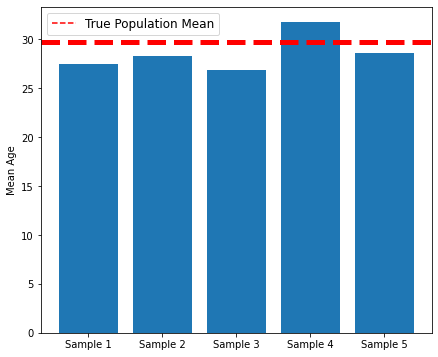

In [ ]:
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Mean Age")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="large"
);

Now we are starting to get a better sense of how each sample estimate is likely to differ from the true population parameter.

### $\bar{x}$ for 10,000 Samples

Now let's see what happens if we take many more samples:

In [ ]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean())

len(sample_means)

10000

Displaying this as a bar graph would be pretty unreadable (showing 10,000 ticks along the x axis) so let's use a histogram instead. This will bin the samples based on their mean ages and show the overall distribution of mean ages, rather than a single bar for each sample.

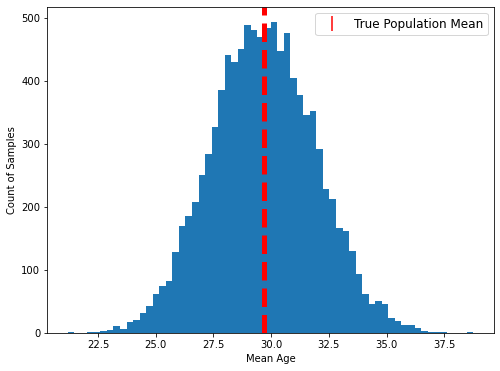

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(sample_means, bins="auto")
ax.set_xlabel("Mean Age")
ax.set_ylabel("Count of Samples")
ax.axvline(x=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D(
        [0],[0],
        color="white",
        marker="|",
        markersize=15,
        markeredgewidth=1.5,
        markeredgecolor="red"
    )],
    labels=["True Population Mean"],
    fontsize="large"
);

### Average $\bar{x}$ vs. $\mu$

Interesting! Our distribution of sample means is approximately centered around the true population mean. Let's take a look at the mean of our sample means:

In [ ]:
ten_thousand_samples_mean = np.mean(sample_means)
ten_thousand_samples_mean

29.678139189972246

Recall that this is our true population statistic $\mu$:

In [ ]:
population_mean

29.69911764705882

Those are pretty close. How close exactly?

In [ ]:
err = np.abs(ten_thousand_samples_mean - population_mean) / population_mean
accuracy = 1 - err
accuracy

0.9992936336582157

Wow! Look at that! The mean of our sample means is extremely close to the actual mean of the population! The mean of means of this simulation shows an accuracy of 99.9%. This will prove useful as we dive into the relationship between samples and distributions.

## Summary


We've begun to investigate and think about how we can gain knowledge about a population using sampling techniques. From there, we further explored how the estimates provided by samples can themselves be analyzed as a mathematical distribution. These observations serve as the intuition behind confidence intervals. In future sections, we'll talk about point estimators (including parameters other than the mean such as standard deviation) and confidence intervals in more detail!